La segmentación de imágenes consiste en dividir una imagen en varios segmentos.

En la _segmentación semántica_, todos los píxeles que forman parte del mismo tipo de objeto se asignan al mismo segmento. Por ejemplo, en el sistema de visión de un vehículo autónomo, todos los píxeles que forman parte de la imagen de un peatón podrían asignarse al segmento "peatón" (habría un segmento que contendría a todos los peatones).

En la _segmentación por instancias_, todos los píxeles que forman parte del mismo objeto individual se asignan al mismo segmento. En este caso, habría un segmento diferente para cada peatón.

El estado del arte en segmentación semántica o por instancias se logra mediante arquitecturas complejas basadas en redes neuronales convolucionales . Aquí vamos a hacer algo mucho más sencillo: _segmentación por colores_. Simplemente asignaremos los píxeles al mismo segmento si tienen un color similar.

En algunas aplicaciones, esto puede ser suficiente. Por ejemplo, si se desea analizar imágenes satelitales para medir cuánta superficie forestal total hay en una región, la segmentación por colores puede ser suficiente.

In [1]:
""" from google.colab import drive
drive.mount('/content/drive') """

" from google.colab import drive\ndrive.mount('/content/drive') "

In [2]:
%cd '/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas/ActividadesPracticas/AM_Clustering'

[WinError 3] El sistema no puede encontrar la ruta especificada: "'/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas/ActividadesPracticas/AM_Clustering'"
c:\Users\yeyer\OneDrive\Desktop\Aprendizaje maquianal practicas\AM_Clustering


C:\Users\yeyer\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [3]:
import numpy as np
from PIL import Image # Import Image class directly

image = np.asarray(Image.open('2_imagenes/ladybug.png'))
image.shape

(533, 800, 3)

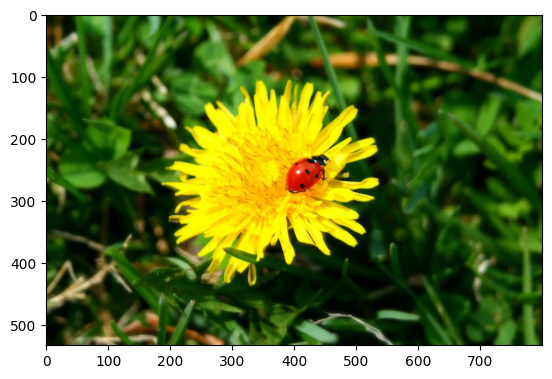

In [4]:
import matplotlib.pyplot as plt

_ = plt.imshow(image)

In [5]:
image.shape

(533, 800, 3)

In [6]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

Utilice el algoritmo de kmeans para segmentar la imagen en distintos colores, pruebe con distintos valores de k. Segmentar la imagen implica reemplazar cada instancia (cada pixel de la imagen) por el centroide asignado por el algoritmo. Use los atributos `cluster_centers_` y `labels_`.

Después de aplicar el algoritmo y segmentar la imagen, grafique la imagen segmentada representada mediante los centroides encontrados. No olvide redimensonar y escalar los datos antes de graficar.¿Qué valor de k considera adecuado para discriminar todos los colores en la imagen?  

Grafique algunas capas de colores por separado. Puede utilizar la siguiente herramienta online: https://www.rapidtables.com/convert/color/rgb-to-hex.html

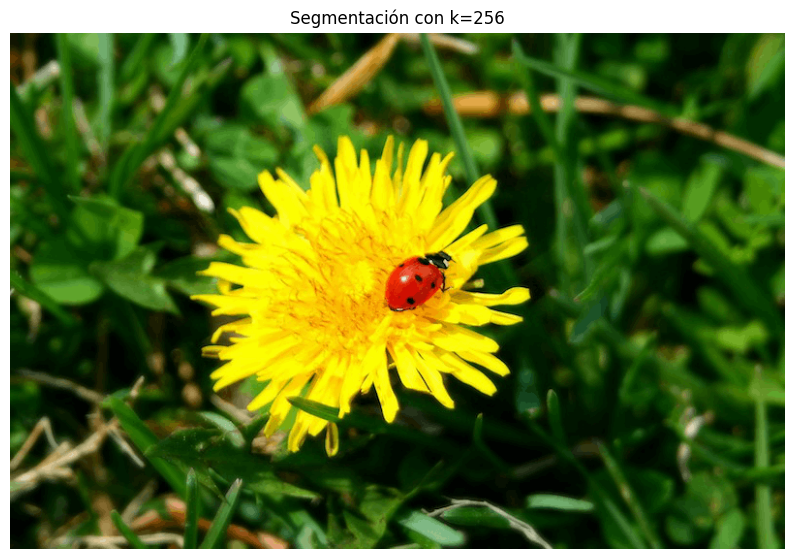

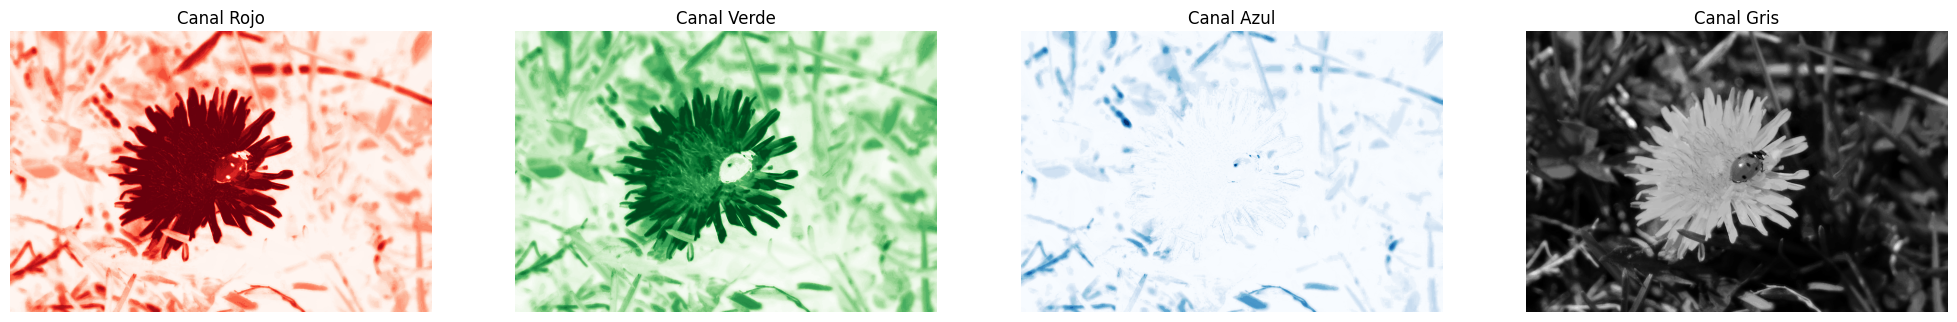

In [20]:
from sklearn.cluster import KMeans

# Prueba con distintos valores de k
k = 256  # Puedes cambiar este valor para probar con diferentes números de clusters

# Aplicar k-means
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Reemplazar cada pixel por su centroide asignado
segmented_image = cluster_centers[labels].reshape(image.shape).astype(np.uint8)

# Graficar la imagen segmentada
plt.figure(figsize=(10, 10))
plt.imshow(segmented_image)
plt.title(f'Segmentación con k={k}')
plt.axis('off')
plt.show()

# Extraer las capas de colores
red_channel = segmented_image[:, :,0]
green_channel = segmented_image[:, :, 1]
blue_channel = segmented_image[:, :, 2]

# Graficar las capas de colores por separado
fig, axes = plt.subplots(1, 4, figsize=(25, 10))

axes[0].imshow(red_channel, cmap='Reds')
axes[0].set_title('Canal Rojo')
axes[0].axis('off')

axes[1].imshow(green_channel, cmap='Greens')
axes[1].set_title('Canal Verde')
axes[1].axis('off')

axes[2].imshow(blue_channel, cmap='Blues')
axes[2].set_title('Canal Azul')
axes[2].axis('off')

# Crear y graficar la capa gris
gray_channel = np.mean(segmented_image, axis=2).astype(np.uint8)
axes[3].imshow(gray_channel, cmap='gray')
axes[3].set_title('Canal Gris')
axes[3].axis('off')

plt.show()

C:\Users\yeyer\AppData\Local\Temp\ipykernel_5792\596112852.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', k)  # Cambia 'tab10' por otros colormaps si lo prefieres
C:\Users\yeyer\AppData\Local\Temp\ipykernel_5792\596112852.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


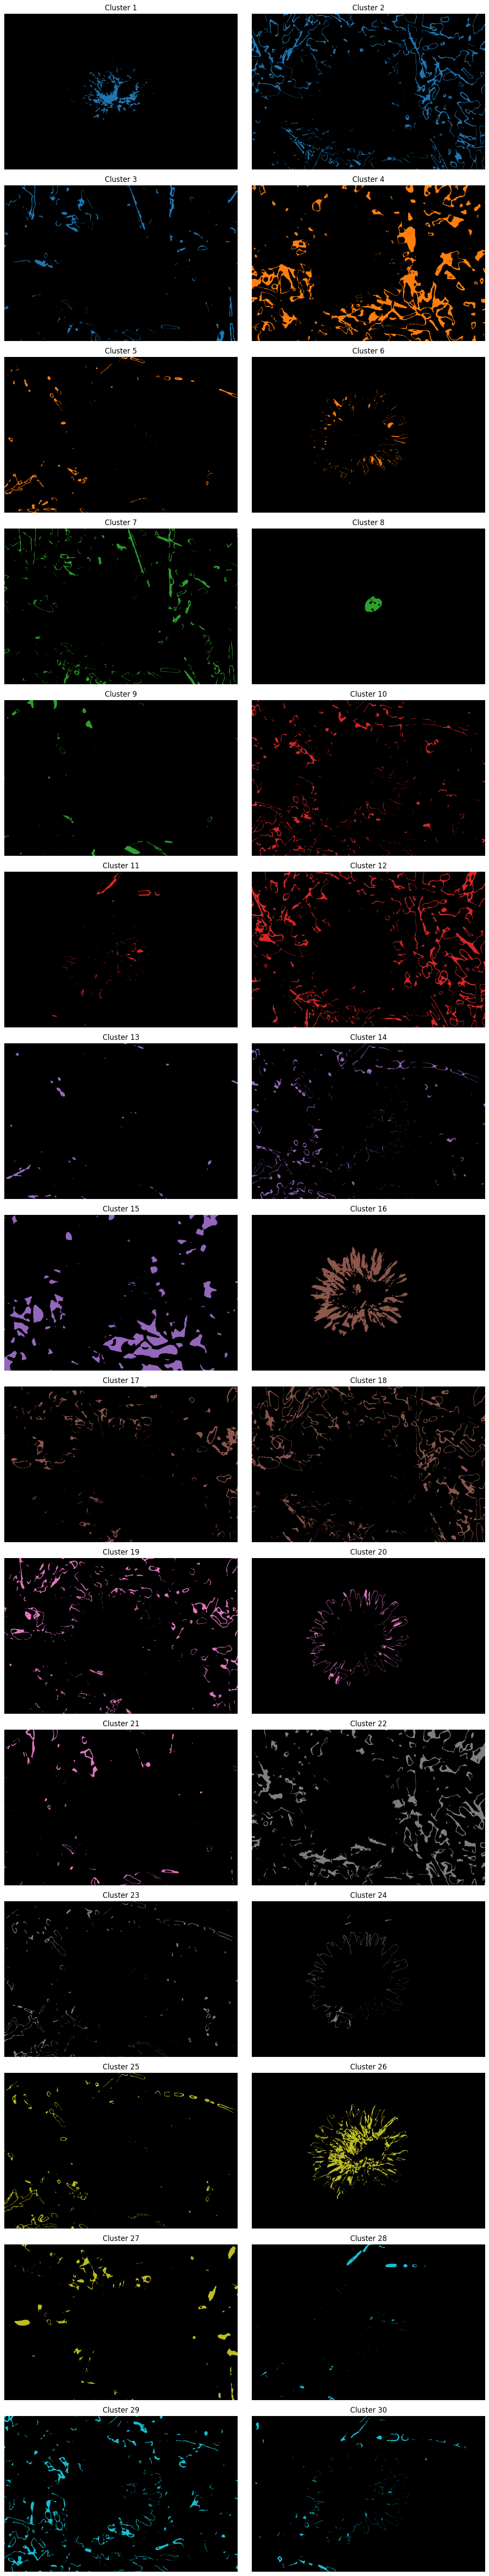

In [17]:
from matplotlib import cm

# Aplicar K-Means con más clusters
k = 30  # Ajusta este valor para más clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
labels = kmeans.labels_

# Usar un colormap de matplotlib para generar colores automáticamente
cmap = cm.get_cmap('tab10', k)  # Cambia 'tab10' por otros colormaps si lo prefieres
colors = cmap(np.linspace(0, 1, k))[:, :3] * 255  # Normalizar colores a [0, 255]

# Crear una figura para visualizar cada cluster como una imagen separada
fig, axes = plt.subplots(k // 2, 2, figsize=(12, 4 * (k // 2)), constrained_layout=True)
axes = axes.flatten()

# Iterar sobre cada cluster y graficar la imagen correspondiente
for i in range(k):
    # Crear una máscara que marque los píxeles que pertenecen al cluster i
    mask = (labels == i).reshape(image.shape[:2])
    
    # Crear una copia de la imagen original con fondo negro
    segmented_image = np.zeros_like(image)    
    # Asignar el color del cluster i a los píxeles de la máscara
    segmented_image[mask] = colors[i].astype(np.uint8)
    
    # Mostrar la imagen segmentada para el cluster i
    ax = axes[i]
    ax.imshow(segmented_image)
    ax.set_title(f'Cluster {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()
